In [567]:
import numpy as np
import pandas as pd
training = pd.read_csv("train.csv")
income = pd.read_csv("income.csv")
training = pd.merge(training, income, 'inner')

In [568]:
#Add important variables
training['TotalSF'] = (training['1stFlrSF'] + training['2ndFlrSF'] + training['TotalBsmtSF'])
training['Age'] = 2010 - training['YearBuilt']

In [569]:
#View Correlation Matrix
print(corr_matrix['SalePrice'].sort_values(ascending = False))
variances = np.var(training, 0)
print(variances[variances > 1].sort_values(ascending = False))

SalePrice         1.000000
TotalSF           0.819136
OverallQual       0.806732
GrLivArea         0.715690
GarageCars        0.654709
GarageArea        0.638412
TotalBsmtSF       0.631402
1stFlrSF          0.610823
FullBath          0.575433
FullBath_Stand    0.575433
FullBath_Norm     0.575433
YearBuilt         0.544119
YearRemodAdd      0.531556
TotRmsAbvGrd      0.522346
GarageYrBlt       0.507182
Fireplaces        0.467265
MasVnrArea        0.455774
BsmtFinSF1        0.374426
LotFrontage       0.367600
OpenPorchSF       0.339290
WoodDeckSF        0.326664
2ndFlrSF          0.299070
HalfBath          0.280305
Income            0.254686
LotArea           0.249923
BsmtUnfSF         0.230804
BsmtFullBath      0.229060
BedroomAbvGr      0.183476
ScreenPorch       0.089439
MoSold            0.065476
3SsnPorch         0.054795
PoolArea          0.037229
MiscVal          -0.019680
LowQualFinSF     -0.023656
BsmtFinSF2       -0.027097
Id               -0.028702
BsmtHalfBath     -0.031480
Y

In [570]:
#Turning Central Air to Numeric
CentralAir = training['CentralAir']
CentralAir_cat_encoded, CentralAir_Categories = CentralAir.factorize()
CentralAir_Num = pd.DataFrame(CentralAir_cat_encoded)
training['CentralAir'] =  CentralAir_Num

In [571]:
#Normalizing and Standardizing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()
training['FullBath_Norm'] = scaler.fit_transform(training[["FullBath"]])
scaler = preprocessing.StandardScaler()
training['FullBath_Stand'] = scaler.fit_transform(training[["FullBath"]])

scaler = preprocessing.MinMaxScaler()
training['OverallQual_Norm'] = scaler.fit_transform(training[["OverallQual"]])
scaler = preprocessing.StandardScaler()
training['OverallQual_Stand'] = scaler.fit_transform(training[["OverallQual"]])

In [572]:
#Making dummy variables
#Sale Condition
training2 = training.copy()
SaleCondition_dummy = pd.get_dummies(training2['SaleCondition'])
SaleCondition_dummy = SaleCondition_dummy.drop(["Abnorml", "AdjLand", "Alloca", "Family", "Partial"], 1)
training2 = pd.concat([training2, SaleCondition_dummy], 1)
training = training2.copy()

#MSZoning
training3 = training.copy()
MSZoning_dummy = pd.get_dummies(training3['MSZoning'])
MSZoning_dummy = MSZoning_dummy.drop(["C (all)"], 1)
training3 = pd.concat([training3, MSZoning_dummy], 1)
training = training3.copy()

#Neighborhood
training4 = training.copy()
Neighborhood_dummy = pd.get_dummies(training4['Neighborhood'])
Neighborhood_dummy = Neighborhood_dummy.drop(["Blmngtn"], 1)
training4 = pd.concat([training4, Neighborhood_dummy], 1)
training = training4.copy()

#Exterior Quality
training5 = training.copy()
ExterQual_dummy = pd.get_dummies(training5['ExterQual'])
#Neighborhood_dummy = Neighborhood_dummy.drop([""], 1)
training5 = pd.concat([training5, ExterQual_dummy], 1)
training = training5.copy()

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1.}
training['KitchenQual_Num'] = (training['KitchenQual']).apply(conv_dict.get)
training['KitchenQual_Num'] = pd.to_numeric(training['KitchenQual_Num'])

#Kitchen Quality
#training6 = training.copy()
#KitchenQual_dummy = pd.get_dummies(training6['KitchenQual'])
#Neighborhood_dummy = Neighborhood_dummy.drop([""], 1)
#training6 = pd.concat([training5, KitchenQual_dummy], 1)
#training = training6.copy()

In [573]:
list(training)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [574]:
#Remove outliers
training = training[training['Id'] != 524]
training = training[training['Id'] != 1299]
training = training[training['Id'] != 1101]
training = training[training['SalePrice'] != 39300]
#training = training[training['SalePrice'] < 500000]
training = training[training['BedroomAbvGr'] != 0]

In [575]:
training.shape

(1440, 123)

In [576]:
# create training and testing vars
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x = np.array(training[['OverallQual', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'KitchenQual_Num', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'CentralAir', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'Normal', 'FV', 'RH', 'RL', 'RM', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Ex', 'Fa', 'Gd', 'TA']])
y = np.array(training['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1152, 51) (1152,)
(288, 51) (288,)


In [577]:
##Ridge Coefficients
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([ 1.11074748e+04,  6.22898744e+01,  6.54417927e+01,  2.72801807e+01,
        -6.71578404e+03, -5.83164022e+03, -1.05326276e+03, -2.96724412e+02,
         1.13263659e+04,  5.63904385e+02,  2.94803879e+01,  3.80637791e+03,
         1.11950734e+04,  6.86803163e+03, -4.80562843e+03,  2.10328898e+01,
        -1.67463825e+01,  2.36759233e+01,  3.44811932e+01,  3.77108990e-01,
        -2.71669520e+03,  2.13782089e+04,  2.39227666e+04,  2.88735689e+04,
         1.46403626e+04, -1.42184547e+04, -1.74603143e+04,  5.50857682e+03,
        -3.90722412e+03, -1.03400209e+04,  1.06800635e+04, -1.26225544e+04,
        -1.18552250e+04,  4.30885298e+03, -1.46766233e+04, -1.72805167e+04,
        -1.51134371e+04, -2.01711376e+04, -2.14586210e+04,  2.64745478e+04,
        -7.41223596e+03, -1.42716238e+04, -1.09454740e+04, -1.84373669e+04,
        -5.90941210e+02,  2.31093686e+04, -3.85689912e+03,  4.07736902e+04,
        -8.42379353e+03, -1.81969834e+04, -1.41529133e+04]),
 -45688.87511346658)

In [578]:
#Lasso Coefficients
lasso = linear_model.Lasso(alpha = 1) # create a ridge regression instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([ 1.08252645e+04,  6.22057074e+01,  6.55037505e+01,  2.71313097e+01,
        -6.58720634e+03, -5.89110509e+03, -9.77073078e+02, -2.85191384e+02,
         1.11210329e+04,  5.00850234e+02,  2.95830257e+01,  3.85277508e+03,
         1.13011051e+04,  7.21299460e+03, -4.93230821e+03,  2.08884519e+01,
        -1.68639707e+01,  2.42847691e+01,  3.49169710e+01,  3.82228102e-01,
        -2.82760915e+03,  3.35593314e+04,  3.67677425e+04,  4.02518324e+04,
         2.58724655e+04, -2.33301949e+04, -2.13101789e+04,  2.16673653e+03,
        -6.76762445e+03, -1.23315764e+04,  7.86970291e+03, -1.60085084e+04,
        -1.41650732e+04,  3.65226856e+03, -1.85852615e+04, -2.03223909e+04,
        -1.82819632e+04, -2.50217816e+04, -2.43315635e+04,  2.55312985e+04,
        -1.06741566e+04, -1.85417552e+04, -1.42262113e+04, -2.11144663e+04,
        -2.83198916e+03,  2.26558358e+04, -5.80572296e+03,  5.54100264e+04,
         5.94045541e+03, -4.27368503e+03, -5.38269966e+00]),
 -66314.69651579918)

In [579]:
print("The determination of ridge regression is: %.4f" %ridge.score(x, y))
print("The determination of lasso regression is: %.4f" %lasso.score(x, y))

The determination of ridge regression is: 0.8748
The determination of lasso regression is: 0.8750


In [491]:
#Ridge Regression used to be best of the linear models

scoredata = []
floatModelScore = np.array(scoredata, dtype = np.float32)
for l in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
    ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
    ridge.fit(x, y)
    model = ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test)
    temp1 = model.score(X_test, y_test)
    floatModelScore = np.append(floatModelScore, temp1)
    #scoredata = scoredata.append(model.score(X_test, y_test))

In [492]:
np.mean(floatModelScore)

0.8713402925881754

In [467]:
#Lasso Regression is NOW BETTER than Ridge

scoredata = []
floatModelScore = np.array(scoredata, dtype = np.float32)
for l in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
    lasso = linear_model.Lasso(alpha = 1) # create a ridge regression instance
    lasso.fit(x, y)
    model = lasso.fit(X_train, y_train)
    predictions = lasso.predict(X_test)
    temp1 = model.score(X_test, y_test)
    floatModelScore = np.append(floatModelScore, temp1)
    #scoredata = scoredata.append(model.score(X_test, y_test))

In [468]:
np.mean(floatModelScore)

0.8649497796037463

In [493]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, x, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.85620019 0.83542347 0.68270553 0.75846139 0.90602816 0.88862614
 0.63934595 0.8599226  0.86418879 0.69411626]


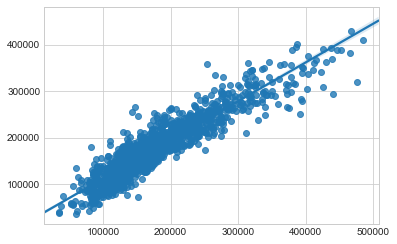

In [494]:
predictions = cross_val_predict(model, x, y, cv=10)
sns.regplot(y, predictions)

In [495]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.8531475128249055


In [ ]:
#EDA

AxesSubplot(0.125,0.125;0.775x0.755)


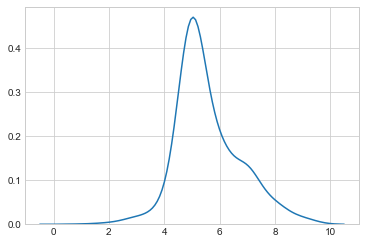

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.hist(training[‘OverallCond’])
sns.set_style('whitegrid')
print(sns.kdeplot(np.array(training['OverallCond']), bw=0.5))

training['LowQualFinSF'].value_counts()

In [15]:
training['GarageCars'].value_counts()

2    809
1    367
3    170
0     80
4      5
Name: GarageCars, dtype: int64

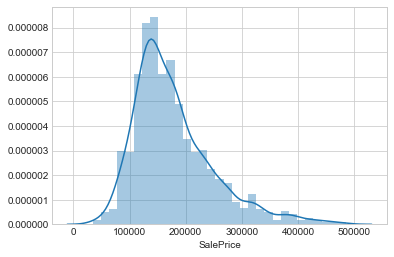

In [16]:
sns.distplot(training['SalePrice'])

In [17]:
print(training['SalePrice'].skew())
print(training['SalePrice'].kurt())

1.2280350104764373
1.8060770167742963


SalePrice         1.000000
TotalSF           0.819136
OverallQual       0.806732
GrLivArea         0.715690
GarageCars        0.654709
GarageArea        0.638412
TotalBsmtSF       0.631402
1stFlrSF          0.610823
FullBath          0.575433
FullBath_Stand    0.575433
FullBath_Norm     0.575433
YearBuilt         0.544119
YearRemodAdd      0.531556
TotRmsAbvGrd      0.522346
GarageYrBlt       0.507182
Fireplaces        0.467265
MasVnrArea        0.455774
BsmtFinSF1        0.374426
LotFrontage       0.367600
OpenPorchSF       0.339290
WoodDeckSF        0.326664
2ndFlrSF          0.299070
HalfBath          0.280305
Income            0.254686
LotArea           0.249923
BsmtUnfSF         0.230804
BsmtFullBath      0.229060
BedroomAbvGr      0.183476
ScreenPorch       0.089439
MoSold            0.065476
3SsnPorch         0.054795
PoolArea          0.037229
MiscVal          -0.019680
LowQualFinSF     -0.023656
BsmtFinSF2       -0.027097
Id               -0.028702
BsmtHalfBath     -0.031480
Y

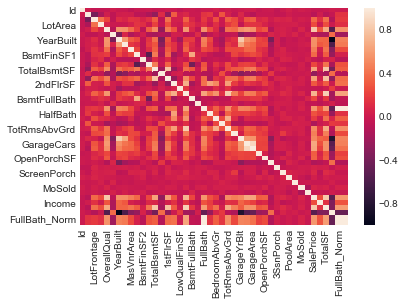

In [18]:
corr_matrix = training.corr()
print(corr_matrix['SalePrice'].sort_values(ascending = False))
sns.heatmap(training.corr())

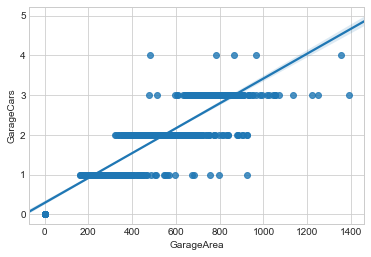

In [19]:
sns.regplot(training['GarageArea'], training['GarageCars'])

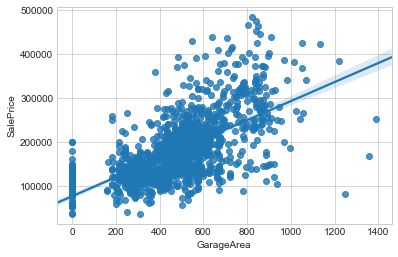

In [20]:
sns.regplot(training['GarageArea'], training['SalePrice'])

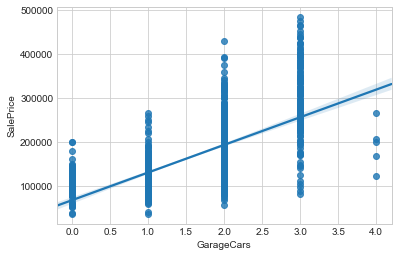

In [21]:
sns.regplot(training['GarageCars'], training['SalePrice'])

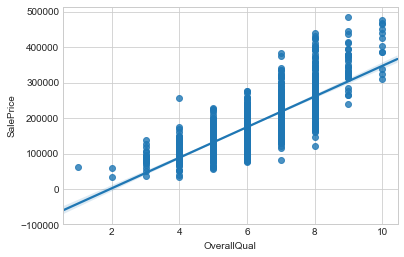

In [22]:
sns.regplot(training['OverallQual'], training['SalePrice'])

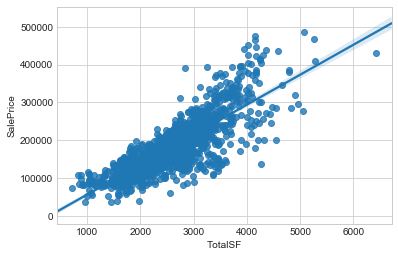

In [23]:
sns.regplot(training['TotalSF'], training['SalePrice'])

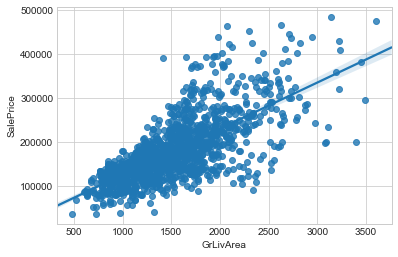

In [24]:
sns.regplot(training['GrLivArea'], training['SalePrice'])

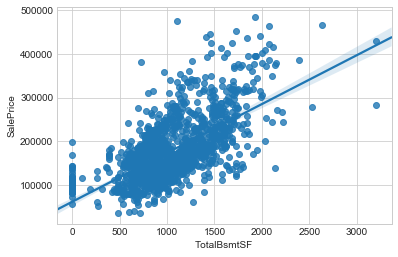

In [25]:
sns.regplot(training['TotalBsmtSF'], training['SalePrice'])

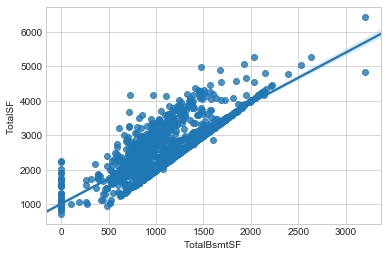

In [26]:
sns.regplot(training['TotalBsmtSF'], training['TotalSF'])

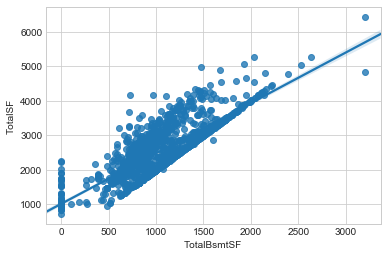

In [27]:
sns.regplot(training['TotalBsmtSF'], training['TotalSF'])

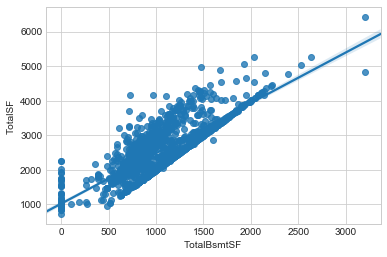

In [28]:
sns.regplot(training['TotalBsmtSF'], training['TotalSF'])

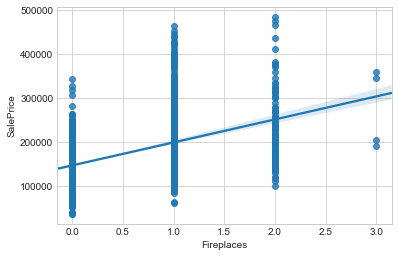

In [29]:
sns.regplot(training['Fireplaces'], training['SalePrice'])

In [135]:
training['BedroomAbvGr'].value_counts()

3    796
2    354
4    207
1     45
5     21
6      7
0      5
8      1
Name: BedroomAbvGr, dtype: int64

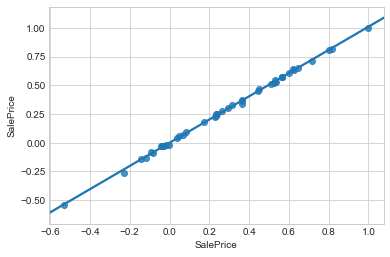

In [139]:
sns.regplot(HasGaragecorr_matrix['SalePrice'], corr_matrix['SalePrice'])

In [140]:
total = training.isnull().sum().sort_values(ascending=False)
percent = 100 * (training.isnull().sum()/training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1431,99.651811
MiscFeature,1382,96.239554
Alley,1345,93.662953
Fence,1157,80.571031
FireplaceQu,687,47.841226
LotFrontage,255,17.757660
GarageType,80,5.571031
GarageQual,80,5.571031
GarageFinish,80,5.571031
GarageCond,80,5.571031


In [141]:
training['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [142]:
training[training['MiscFeature'] == 'TenC']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Income,TotalSF,Age,FullBath_Norm,FullBath_Stand
444,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,7,2006,WD,Normal,250000,43000,4176,32,1.0,2.607671


In [144]:
training.groupby('Neighborhood').median().sort_values(['SalePrice'], ascending = False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Income,TotalSF,Age,FullBath_Norm,FullBath_Stand
Neighborhood,,,,,,,,,,,,,,,,,,,,,
NridgHt,540.5,60.0,86.0,11453.0,8.0,5.0,2006.0,2006.0,286.0,798.0,...,0.0,0.0,7.0,2008.0,311906.5,68000.0,3426.0,4.0,0.666667,0.788453
NoRidge,754.5,60.0,89.5,11899.0,8.0,5.0,1995.0,1996.5,376.5,798.5,...,0.0,0.0,6.0,2008.0,290000.0,41000.0,3731.5,15.0,0.666667,0.788453
StoneBr,687.5,120.0,60.0,6188.5,8.0,5.0,2000.5,2000.5,0.0,886.5,...,0.0,0.0,8.0,2008.0,267500.0,53000.0,3173.0,9.5,0.666667,0.788453
Timber,799.5,20.0,85.0,12781.5,7.5,5.0,2002.0,2002.0,82.0,886.5,...,0.0,0.0,5.0,2008.0,228475.0,60000.0,3143.0,8.0,0.666667,0.788453
Somerst,764.5,60.0,73.5,8640.0,7.0,5.0,2006.0,2006.0,36.0,25.5,...,0.0,0.0,6.0,2008.0,225500.0,64000.0,2759.5,4.0,0.666667,0.788453
Crawfor,861.0,70.0,74.0,11500.0,6.0,7.0,1938.0,1987.0,0.0,326.0,...,0.0,0.0,7.0,2007.0,200624.0,49000.0,2759.0,72.0,0.333333,-1.030765
ClearCr,523.5,50.0,80.0,17575.0,6.0,5.0,1966.5,1989.0,0.0,585.5,...,0.0,0.0,6.0,2008.0,200250.0,28000.0,3046.5,43.5,0.666667,0.788453
CollgCr,755.0,20.0,70.0,9356.0,7.0,5.0,2002.0,2002.0,24.0,500.0,...,0.0,0.0,6.0,2008.0,197200.0,40000.0,2648.5,8.0,0.666667,0.788453
Blmngtn,791.0,120.0,43.0,3182.0,7.0,5.0,2005.0,2006.0,18.0,16.0,...,0.0,0.0,5.0,2007.0,191000.0,35000.0,2850.0,5.0,0.666667,0.788453


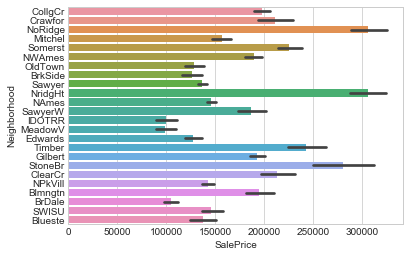

In [145]:
sns.barplot(training['SalePrice'], training['Neighborhood'])

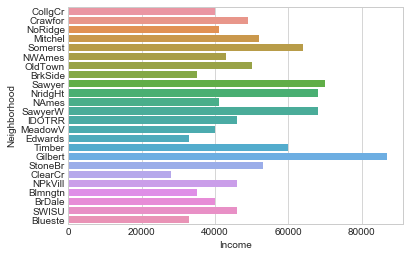

In [146]:
sns.barplot(training['Income'], training['Neighborhood'])

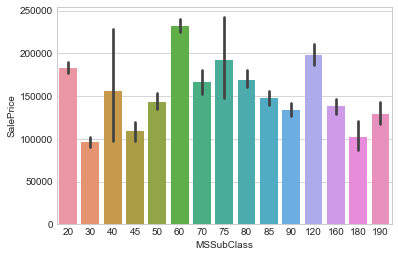

In [181]:
sns.barplot(training['MSSubClass'], training['SalePrice'])

RL         1127
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


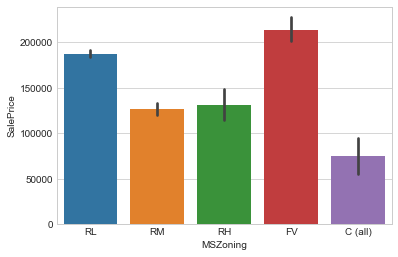

In [184]:
sns.barplot(training['MSZoning'], training['SalePrice'])
print(training['MSZoning'].value_counts())

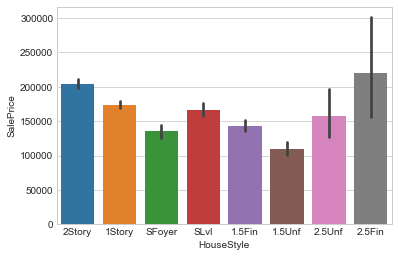

In [298]:
sns.barplot(training['HouseStyle'], training['SalePrice'])

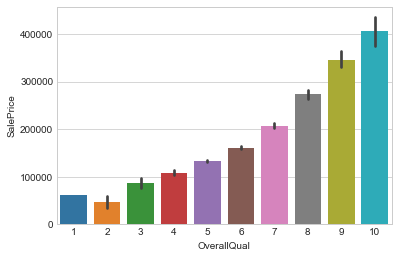

In [299]:
sns.barplot(training['OverallQual'], training['SalePrice'])

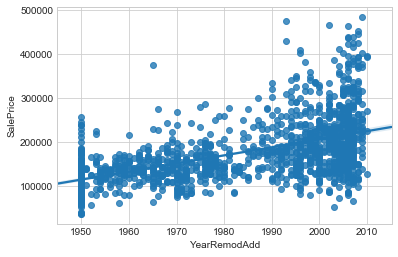

In [302]:
sns.regplot(training['YearRemodAdd'], training['SalePrice'])

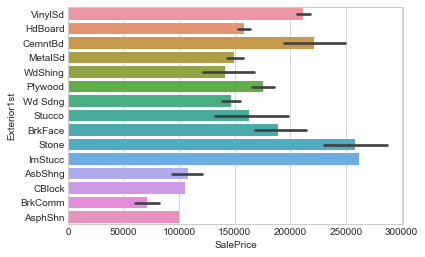

In [305]:
sns.barplot(training['SalePrice'], training['Exterior1st'])

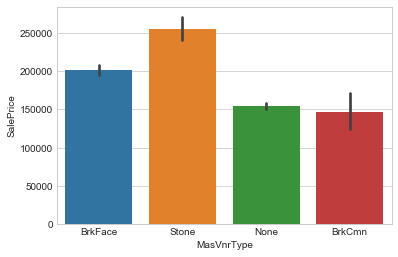

In [320]:
sns.barplot(training['MasVnrType'], training['SalePrice'])

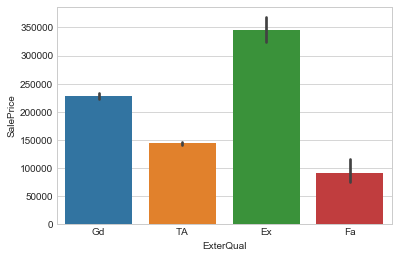

In [321]:
sns.barplot(training['ExterQual'], training['SalePrice'])

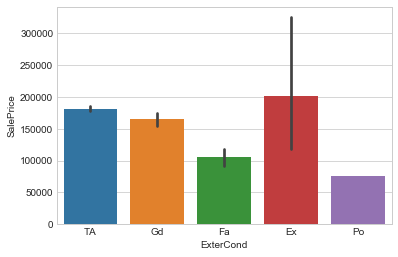

In [322]:
sns.barplot(training['ExterCond'], training['SalePrice'])

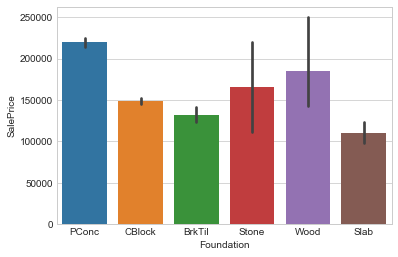

In [325]:
sns.barplot(training['Foundation'], training['SalePrice'])

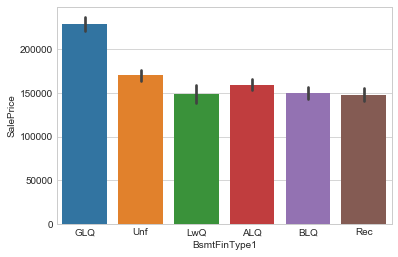

In [328]:
sns.barplot(training['BsmtFinType1'], training['SalePrice'])

SBrkr    1312
FuseA      94
FuseF      25
FuseP       3
Mix         1
Name: Electrical, dtype: int64

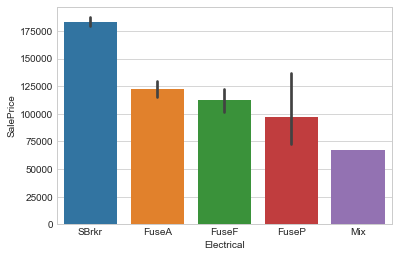

In [330]:
sns.barplot(training['Electrical'], training['SalePrice'])
training['Electrical'].value_counts()

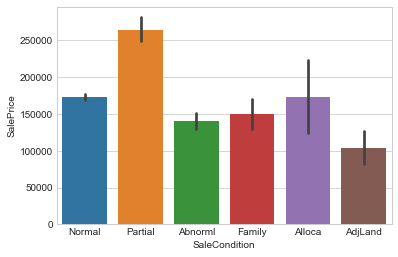

In [417]:
sns.barplot(training['SaleCondition'], training['SalePrice'])

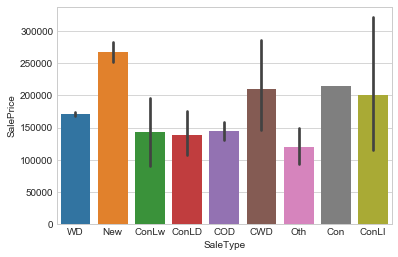

In [418]:
sns.barplot(training['SaleType'], training['SalePrice'])

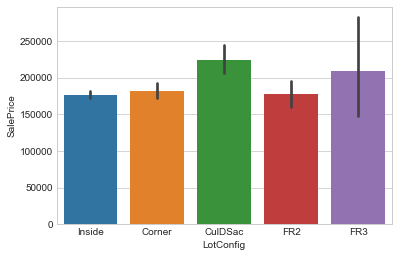

In [564]:
sns.barplot(training['LotConfig'], training['SalePrice'])

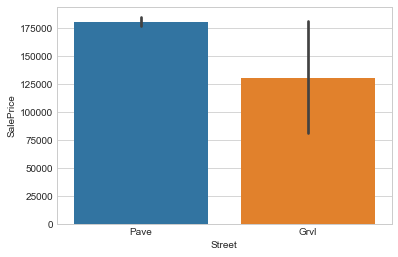

In [566]:
sns.barplot(training['Street'], training['SalePrice'])

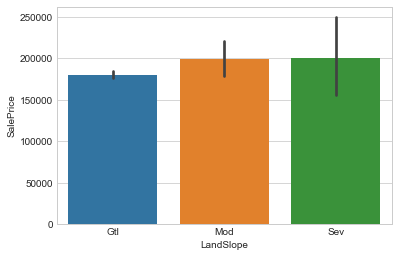

In [565]:
sns.barplot(training['LandSlope'], training['SalePrice'])

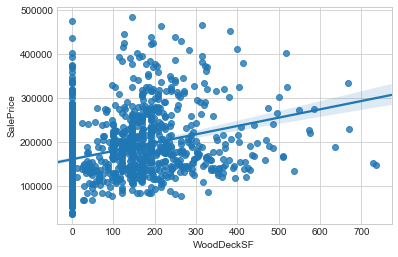

In [366]:
sns.regplot(training['WoodDeckSF'], training['SalePrice'])

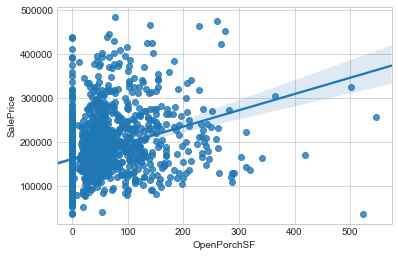

In [369]:
sns.regplot(training['OpenPorchSF'], training['SalePrice'])

In [147]:
training[training['Neighborhood'] == 'NridgHt'].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Income,TotalSF,Age,FullBath_Norm,FullBath_Stand
count,74.000000,74.000000,73.000000,74.000000,74.000000,74.0,74.000000,74.000000,73.000000,74.000000,...,74.0,74.0,74.000000,74.000000,74.000000,74.0,74.000000,74.000000,74.000000,74.000000
mean,605.459459,63.243243,80.972603,10758.527027,8.216216,5.0,2005.567568,2006.054054,328.643836,671.581081,...,0.0,0.0,7.027027,2007.756757,305449.297297,68000.0,3462.162162,4.432432,0.675676,0.837621
std,406.944720,44.663371,25.079857,3646.749651,0.983010,0.0,1.752345,1.703276,212.331068,602.104005,...,0.0,0.0,2.789280,1.332531,81268.757229,0.0,611.240105,1.752345,0.109974,0.600200
min,12.000000,20.000000,34.000000,2268.000000,6.000000,5.0,2003.000000,2003.000000,0.000000,0.000000,...,0.0,0.0,1.000000,2006.000000,154000.000000,68000.0,2390.000000,1.000000,0.333333,-1.030765
25%,312.750000,20.000000,62.000000,8340.750000,8.000000,5.0,2004.000000,2005.000000,176.000000,0.000000,...,0.0,0.0,5.000000,2007.000000,250823.250000,68000.0,3046.000000,3.000000,0.666667,0.788453
50%,540.500000,60.000000,86.000000,11453.000000,8.000000,5.0,2006.000000,2006.000000,286.000000,798.000000,...,0.0,0.0,7.000000,2008.000000,311906.500000,68000.0,3426.000000,4.000000,0.666667,0.788453
75%,960.750000,120.000000,99.000000,13458.500000,9.000000,5.0,2007.000000,2007.000000,388.000000,1218.000000,...,0.0,0.0,9.000000,2009.000000,365470.500000,68000.0,3859.250000,6.000000,0.666667,0.788453
max,1438.000000,160.000000,129.000000,20431.000000,10.000000,5.0,2009.000000,2010.000000,922.000000,1646.000000,...,0.0,0.0,12.000000,2010.000000,485000.000000,68000.0,5066.000000,7.000000,1.000000,2.607671


In [148]:
training[training['YearBuilt'] >= 2000].describe() - training[training['YearBuilt'] < 2000].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Income,TotalSF,Age,FullBath_Norm,FullBath_Stand
count,-676.000000,-676.000000,-511.000000,-676.000000,-676.000000,-676.000000,-676.000000,-676.000000,-682.000000,-676.000000,...,-676.000000,-676.000000,-676.000000,-676.000000,-676.000000,-676.000000,-676.000000,-676.000000,-676.000000,-676.000000
mean,5.334061,2.929974,3.944014,-1145.813367,1.754994,-0.772408,45.829625,27.625439,65.938310,14.660217,...,-2.834280,-52.969797,0.160018,-0.156479,81364.950389,10652.731260,528.238985,-45.829625,0.172375,0.940763
std,11.150546,1.111994,0.222772,-7499.108858,-0.104219,-1.030799,-23.882672,-17.054321,24.080144,131.452222,...,-41.527082,-476.906561,0.231697,-0.015385,15851.828272,3310.545217,-73.720064,-23.882672,-0.065756,-0.358873
min,-3.000000,0.000000,3.000000,817.000000,3.000000,1.000000,128.000000,50.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,49600.000000,5000.000000,899.000000,-11.000000,0.000000,0.000000
25%,-18.000000,0.000000,4.000000,137.750000,2.000000,0.000000,62.000000,45.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,64075.000000,-1000.000000,592.000000,-29.000000,0.333333,1.819218
50%,0.500000,10.000000,4.500000,182.500000,1.000000,-1.000000,43.000000,28.000000,94.000000,-351.000000,...,0.000000,0.000000,0.000000,0.000000,78300.000000,21000.000000,623.000000,-43.000000,0.333333,1.819218
75%,5.750000,-10.000000,5.000000,484.000000,2.000000,-2.000000,29.000000,11.000000,120.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,95575.000000,18000.000000,509.500000,-62.000000,0.000000,0.000000
max,-5.000000,-10.000000,-131.000000,-191988.000000,0.000000,-3.000000,11.000000,0.000000,-569.000000,-159.000000,...,-738.000000,-13500.000000,0.000000,0.000000,10000.000000,0.000000,-1162.000000,-128.000000,0.000000,0.000000


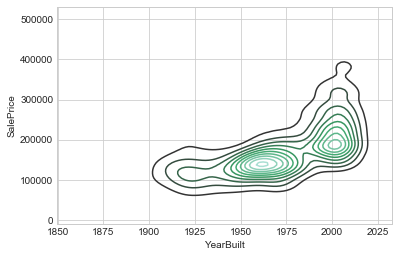

In [149]:
sns.kdeplot(training['YearBuilt'], training['SalePrice'])

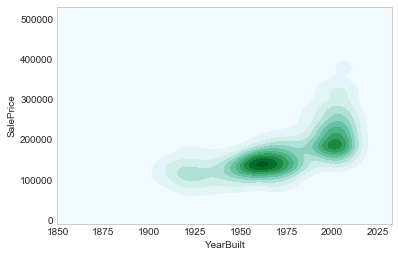

In [150]:
sns.kdeplot(training['YearBuilt'], training['SalePrice'], shade = True)

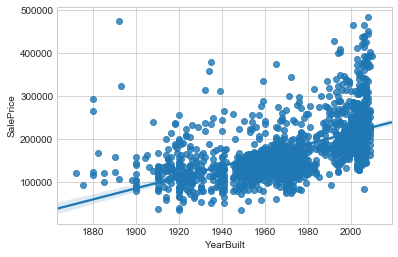

In [151]:
sns.regplot(training['YearBuilt'], training['SalePrice'])

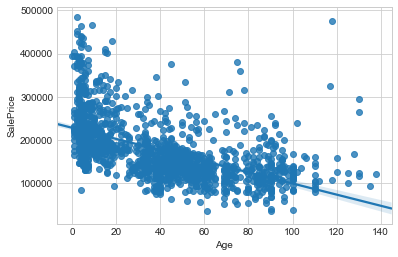

In [152]:
sns.regplot(training['Age'], training['SalePrice'])

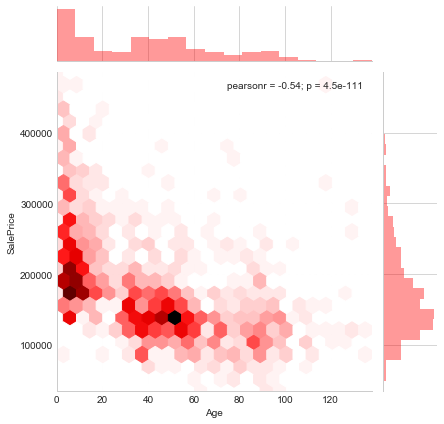

In [415]:
sns.jointplot(training['Age'], training['SalePrice'], kind='hex', color = 'r')

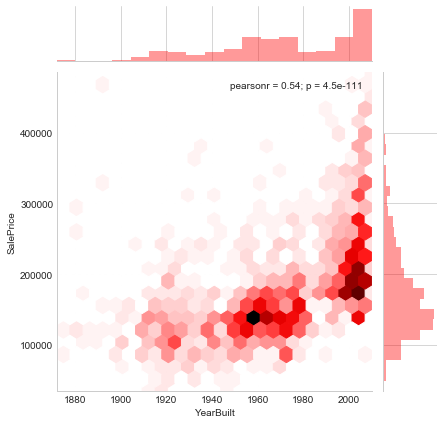

In [416]:
sns.jointplot(training['YearBuilt'], training['SalePrice'], kind='hex', color = 'r')

In [99]:
training.groupby('Neighborhood').describe()

1stFlrSF                                                    \
                count         mean         std     min      25%     50%   
Neighborhood                                                              
Blmngtn          17.0  1427.941176  138.178087  1145.0  1269.00  1500.0   
Blueste           2.0   638.500000  109.601551   561.0   599.75   638.5   
BrDale           16.0   583.875000  106.454920   483.0   483.00   577.5   
BrkSide          58.0   914.724138  188.943674   334.0   786.50   925.5   
ClearCr          28.0  1307.285714  270.536621   616.0  1147.00  1305.0   
CollgCr         150.0  1164.626667  320.134526   689.0   882.00  1068.0   
Crawfor          51.0  1264.725490  444.685510   661.0   906.50  1152.0   
Edwards         100.0  1093.060000  508.618188   495.0   831.25   990.0   
Gilbert          79.0   942.506329  245.252663   616.0   781.00   884.0   
IDOTRR           37.0   835.162162  194.259779   372.0   756.00   803.0   
MeadowV          17.0   724.235294  235.752129   526.0   546.00   630.0   
Mitchel          49.0  1186.755102  314.883611   768.0   923.00  1120.0   
NAmes           225.0  1172.622222  305.333562   576.0   958.00  1095.0   
NPkVill           9.0   919.777778   98.517483   804.0   855.00   855.0   
NWAmes           73.0  1316.493151  345.868276   708.0  1098.00  1328.0   
NoRidge          41.0  1524.829268  491.871167   979.0  1203.00  1352.0   
NridgHt          77.0  1579.766234  370.957754   764.0  1324.00  1610.0   
OldTown         113.0   970.955752  250.217098   572.0   808.00   916.0   
SWISU            25.0  1044.160000  296.636517   438.0   877.00   990.0   
Sawyer           74.0  1113.351351  289.759013   663.0   906.00  1040.0   
SawyerW          59.0  1196.389831  325.692526   626.0   960.50  1120.0   
Somerst          86.0  1134.058140  397.379900   520.0   769.00  1085.0   
StoneBr          25.0  1548.320000  316.342736  1064.0  1337.00  1530.0   
Timber           38.0  1463.684211  420.677581   754.0  1199.75  1483.0   

                              2ndFlrSF               ...   YearRemodAdd  \
                  75%     max    count        mean   ...            75%   
Neighborhood                                         ...                  
Blmngtn       1555.00  1569.0     17.0    0.000000   ...        2007.00   
Blueste        677.25   716.0      2.0  754.000000   ...        1980.00   
BrDale         672.00   765.0     16.0  559.312500   ...        1972.25   
BrkSide       1035.25  1445.0     58.0  279.448276   ...        1994.75   
ClearCr       1458.00  1867.0     28.0  463.714286   ...        1997.00   
CollgCr       1473.50  2000.0    150.0  315.873333   ...        2005.00   
Crawfor       1643.00  2515.0     51.0  519.352941   ...        2002.50   
Edwards       1185.75  4692.0    100.0  246.980000   ...        2002.25   
Gilbert       1008.50  1746.0     79.0  698.139241   ...        2005.00   
IDOTRR         997.00  1226.0     37.0  277.216216   ...        1982.00   
MeadowV        798.00  1291.0     17.0  334.705882   ...        1976.00   
Mitchel       1344.00  1959.0     49.0  107.448980   ...        1998.00   
NAmes         1314.00  2223.0    225.0  134.915556   ...        1988.00   
NPkVill        958.00  1069.0      9.0  333.222222   ...        1977.00   
NWAmes        1523.00  2524.0     73.0  411.287671   ...        1991.00   
NoRidge       1686.00  3228.0     41.0  984.024390   ...        1998.00   
NridgHt       1836.00  2402.0     77.0  336.181818   ...        2008.00   
OldTown       1089.00  1766.0    113.0  488.150442   ...        2000.00   
SWISU         1166.00  1699.0     25.0  645.080000   ...        1995.00   
Sawyer        1278.25  1803.0     74.0  101.783784   ...        1995.00   
SawyerW       1438.00  2196.0     59.0  398.627119   ...        1998.00   
Somerst       1486.25  2097.0     86.0  459.802326   ...        2007.00   
StoneBr       1742.00  2234.0     25.0  330.760000   ...        2006.00   
Timber        1649.75  2898.0     38.

In [100]:
training[training['SalePrice'] > 500000]['Neighborhood'].value_counts()

StoneBr    3
NridgHt    3
NoRidge    3
Name: Neighborhood, dtype: int64

In [101]:
training[training['Neighborhood'] == 'StoneBr'].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Income
count,25.000000,25.000000,20.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,...,25.000000,25.000000,25.00,25.000000,25.0,25.0,25.000000,25.000000,25.00000,25.0
mean,669.520000,83.200000,62.70000,10671.920000,8.160000,5.000000,1998.480000,1998.840000,182.760000,822.92000,...,51.080000,25.920000,6.72,27.760000,0.0,0.0,7.640000,2007.920000,310499.00000,53000.0
std,345.687253,48.880807,23.44557,9892.293347,0.687992,0.763763,9.065135,9.222617,281.823272,555.26292,...,44.341403,61.879534,33.60,67.395153,0.0,0.0,2.118962,1.497776,112969.67664,0.0
min,59.000000,20.000000,39.00000,3696.000000,7.000000,2.000000,1984.000000,1984.000000,0.000000,0.00000,...,0.000000,0.000000,0.00,0.000000,0.0,0.0,3.000000,2006.000000,170000.00000,53000.0
25%,471.000000,20.000000,41.00000,5330.000000,8.000000,5.000000,1988.000000,1989.000000,0.000000,368.00000,...,0.000000,0.000000,0.00,0.000000,0.0,0.0,6.000000,2007.000000,213500.00000,53000.0
50%,689.000000,120.000000,61.50000,6820.000000,8.000000,5.000000,2001.000000,2002.000000,0.000000,945.00000,...,48.000000,0.000000,0.00,0.000000,0.0,0.0,7.000000,2008.000000,278000.00000,53000.0
75%,770.000000,120.000000,80.50000,12438.000000,8.000000,5.000000,2005.000000,2006.000000,245.000000,1196.00000,...,75.000000,0.000000,0.00,0.000000,0.0,0.0,10.000000,2009.000000,377426.00000,53000.0
max,1362.000000,160.000000,124.00000,53504.000000,10.000000,7.000000,2010.000000,2010.000000,1031.000000,1904.00000,...,152.000000,234.000000,168.00,224.000000,0.0,0.0,12.000000,2010.000000,556581.00000,53000.0


In [102]:
training[training['Neighborhood'] == 'NridgHt'].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Income
count,77.000000,77.000000,76.000000,77.000000,77.000000,77.0,77.000000,77.000000,76.000000,77.000000,...,77.000000,77.0,77.000000,77.000000,77.0,77.0,77.000000,77.000000,77.000000,77.0
mean,609.714286,62.077922,81.881579,10887.948052,8.259740,5.0,2005.675325,2006.168831,333.881579,696.779221,...,75.532468,0.0,3.948052,15.038961,0.0,0.0,6.857143,2007.818182,316270.623377,68000.0
std,401.319038,44.317564,24.991181,3637.945957,0.992108,0.0,1.802349,1.772618,214.653455,632.104185,...,55.489113,0.0,34.644015,53.211208,0.0,0.0,2.873263,1.344847,96392.544954,0.0
min,12.000000,20.000000,34.000000,2268.000000,6.000000,5.0,2003.000000,2003.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,2006.000000,154000.000000,68000.0
25%,321.000000,20.000000,62.750000,8769.000000,8.000000,5.0,2004.000000,2005.000000,177.500000,0.000000,...,38.000000,0.0,0.000000,0.000000,0.0,0.0,5.000000,2007.000000,253293.000000,68000.0
50%,553.000000,60.000000,88.500000,11694.000000,8.000000,5.0,2006.000000,2006.000000,289.000000,863.000000,...,62.000000,0.0,0.000000,0.000000,0.0,0.0,7.000000,2008.000000,315000.000000,68000.0
75%,927.000000,120.000000,101.500000,13478.000000,9.000000,5.0,2007.000000,2008.000000,414.000000,1261.000000,...,102.000000,0.0,0.000000,0.000000,0.0,0.0,9.000000,2009.000000,374000.000000,68000.0
max,1438.000000,160.000000,129.000000,20431.000000,10.000000,5.0,2009.000000,2010.000000,922.000000,2188.000000,...,274.000000,0.0,304.000000,260.000000,0.0,0.0,12.000000,2010.000000,611657.000000,68000.0


In [103]:
training['PoolArea'].value_counts()

0      1442
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [28]:
training[training['PoolArea'] != 0]['SalePrice'].describe()

count         5.000000
mean     222394.000000
std       44833.148228
min      171000.000000
25%      181000.000000
50%      235000.000000
75%      250000.000000
max      274970.000000
Name: SalePrice, dtype: float64

In [29]:
training[training['PoolArea'] == 0]['SalePrice'].describe()

count      1442.000000
mean     178306.461859
std       71867.283172
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      213000.000000
max      485000.000000
Name: SalePrice, dtype: float64

In [30]:
training[training['Fireplaces'] == 0]['SalePrice'].describe()

count       688.000000
mean     141597.998547
std       44173.934005
min       34900.000000
25%      112000.000000
50%      135000.000000
75%      164550.000000
max      342643.000000
Name: SalePrice, dtype: float64

In [31]:
training[training['Fireplaces'] == 1]['SalePrice'].describe()

count       644.000000
mean     209176.149068
std       73589.241673
min       60000.000000
25%      157375.000000
50%      189000.000000
75%      252758.500000
max      465000.000000
Name: SalePrice, dtype: float64

In [32]:
training[training['Fireplaces'] == 2]['SalePrice'].describe()

count       111.000000
mean     225234.459459
std       84791.565669
min      100000.000000
25%      160000.000000
50%      205000.000000
75%      271000.000000
max      485000.000000
Name: SalePrice, dtype: float64

In [33]:
training[training['Fireplaces'] == 3]['SalePrice'].describe()

count         4.000000
mean     275000.000000
std       89907.359728
min      190000.000000
25%      201250.000000
50%      275000.000000
75%      348750.000000
max      360000.000000
Name: SalePrice, dtype: float64

In [103]:
# create training and testing vars
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x = np.array(training[['OverallQual', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'CentralAir', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']])
y = np.array(training['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1159, 19) (1159,)
(290, 19) (290,)


In [104]:
## coefficients
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([ 1.99576013e+04,  5.06660616e+01,  4.62240674e+01,  1.60474216e+01,
        -8.76045070e+03,  4.92716835e+03, -1.05014277e+03, -3.01451532e+02,
         4.44097929e+03,  3.78678549e+01,  6.16925605e+03,  1.20241415e+04,
         7.45538813e+03, -1.49502497e+03,  3.45584257e+01, -2.55945923e+00,
         4.20737375e+01,  5.74332823e+01, -1.44354086e-01]),
 -58496.279598527006)

In [105]:
print("The determination of ridge regression is: %.4f" %ridge.score(x, y))

The determination of ridge regression is: 0.7862


In [106]:
#Ridge Regression used to be best of the linear models

scoredata = []
floatModelScore = np.array(scoredata, dtype = np.float32)
for l in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    ridge = linear_model.Ridge(alpha = 1e2) # create a ridge regression instance
    ridge.fit(x, y)
    model = ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test)
    temp1 = model.score(X_test, y_test)
    floatModelScore = np.append(floatModelScore, temp1)
    #scoredata = scoredata.append(model.score(X_test, y_test))

In [107]:
np.mean(floatModelScore)

0.7646538227857425

In [108]:
#Lasso Regression is NOW BETTER than Ridge

scoredata = []
floatModelScore = np.array(scoredata, dtype = np.float32)
for l in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    lasso = linear_model.Lasso(alpha = 1e2) # create a ridge regression instance
    lasso.fit(x, y)
    model = lasso.fit(X_train, y_train)
    predictions = lasso.predict(X_test)
    temp1 = model.score(X_test, y_test)
    floatModelScore = np.append(floatModelScore, temp1)
    #scoredata = scoredata.append(model.score(X_test, y_test))

In [109]:
np.mean(floatModelScore)

0.7625184880635044

In [410]:
alpha_100 = np.logspace(0, 6, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(x, y)
    coef.append(ridge.coef_)

In [411]:
df_coef = pd.DataFrame(coef, index=alpha_100, columns=['OverallQual', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'CentralAir'])
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

AssertionError: 14 columns passed, passed data had 19 columns

In [47]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, x, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.83369856 0.80121008 0.72028442 0.67073768 0.88448635 0.83911568
 0.51788958 0.8234315  0.8364728  0.75128173]


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[]


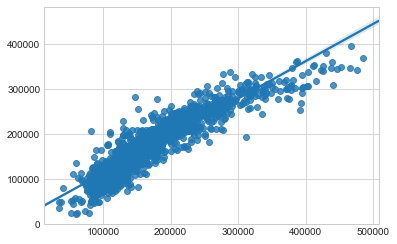

In [48]:
predictions = cross_val_predict(model, x, y, cv=10)
sns.regplot(y, predictions)
print(y[predictions < 20000])

In [64]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [1431, 287]

In [70]:
#Cross Validation
import sklearn.model_selection as ms
import sklearn.cross_validation as cv

ms_k3s = ms.StratifiedKFold(n_splits=3)
for train_idx, val_idx in ms_k3s.split(X=X_train, y=y_train):
    print('Train:', y[train_idx], 'Validation: ', y[val_idx])
    
cv_k3s = cv.StratifiedKFold(y_train, n_folds=3)
for train_idx, val_idx in cv_k3s:
    print('Train:', y[train_idx], 'Validation: ', y[val_idx])

Train: [172500 202500 126500 174000 205000 176000 163990 153900 122000 235000
 254900 320000 163000 211000 177000 171500 112000 186000 134450 386250
 112000 120000 230000 276000 151000 185000 207500 244600 122000 233230
 167000 149900 225000 360000 188500 260000 187500 342643 354000 139000
 284000 192000 202900  87500 140200 190000 280000 159000 172400 125000
 219500 148000 340000 127000 240000 129000 123000 169500 164990 168000
 150000 115000 142000 206300 215000 113000 315000 109008  81000 116000
 119000 118000 172500 199900 119500 110000 204000 210000 110000 155000
 178740 146500 187000 440000 297000 374000 155000 132500 156000 115000
 133000 155000 430000 120000 113000 215000 161000 129900 134000 265000
 106250 150000 159000 176000 200624 107500 107500 188000 248000 213250
 133000 179665 129500 140000 255500 284000 141000 108000 234000 268000
 128000 325000 214000 316600 135960 146000 131500 181900 325000 369900
 137000  79500 185900 138000 114504 194201 141000 205000 152000 225000

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [71]:
training.shape

(1447, 85)

In [50]:
##Test Data
test = pd.read_csv("test.csv")

In [67]:
training.groupby('Neighborhood').sort_values('SalePrice')

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [312]:
## coefficients
x = np.array(training[['OverallQual', 'FullBath', 'YearBuilt', 'TotalSF', 'TotRmsAbvGrd', 'GarageArea']])
y = np.array(training['SalePrice'])
lasso = linear_model.Lasso(alpha=1) # create a lasso instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

ValueError: could not convert string to float: 'Y'

In [70]:
## determination
print("The determination of lasso regression is: %.4f" %lasso.score(x, y))

The determination of lasso regression is: 0.7583


In [52]:
test['GarageArea'] = test['GarageArea'].fillna(0)

In [53]:
test['TotalSF'] = test['TotalSF'].fillna(test['GrLivArea'])

KeyError: 'TotalSF'

In [389]:
## prediction
y_predict = lasso.predict(test[['OverallQual', 'FullBath', 'YearBuilt', 'TotalSF', 'TotRmsAbvGrd', 'GarageArea']])

In [390]:
y_predict

array([132234.77085924, 169602.46044852, 162488.79980309, ...,
       156109.98763731, 115234.40273595, 238622.25571868])